In [2]:
import pandas as pd
import numpy as np
import sys
import os
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output
import openmatrix as omx

OVERRIDE_FILE_FOLDER = r'E:\Met_Council\metc-asim-model\estimation\data'
SKIM_PATH = r'E:\Met_Council\metc-asim-model\Base_2018\OMX\allskims.omx'
SKIM_TABLE = 'DIST'

hh = pd.read_csv(os.path.join(OVERRIDE_FILE_FOLDER, 'override_households.csv'))
per = pd.read_csv(os.path.join(OVERRIDE_FILE_FOLDER, 'override_persons.csv'))

omx_file = omx.open_file(SKIM_PATH, 'r')
dist_skim = np.array(omx_file[SKIM_TABLE])
omx_file.close()


In [3]:
per.pemploy.value_counts().sort_index()

1    39498
2     6897
3    20520
4    13091
Name: pemploy, dtype: int64

In [4]:
per.ptype.value_counts().sort_index()

1    39463
2     5504
3     2140
4     4193
5    14444
6     1171
7     8506
8     4585
Name: ptype, dtype: int64

In [5]:
pd.crosstab(per.ptype, per.pstudent, margins = True)

pstudent,1,2,3,All
ptype,,,,
1,0,47,39416,39463
2,51,347,5106,5504
3,0,2140,0,2140
4,0,0,4193,4193
5,0,0,14444,14444
6,1171,0,0,1171
7,8506,0,0,8506
8,4585,0,0,4585
All,14313,2534,63159,80006


<Axes: >

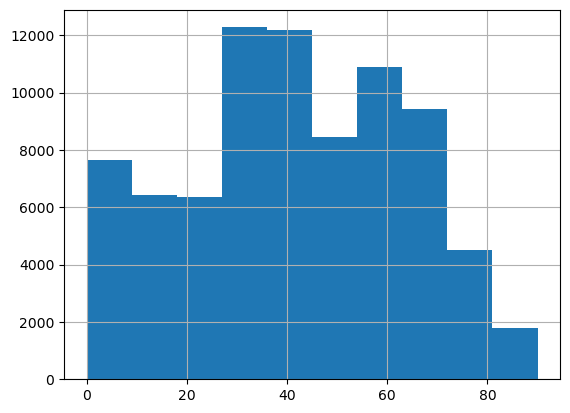

In [6]:
per.age.hist()

In [7]:
PEMPLOY_FULL = 1
PEMPLOY_PART = 2
PEMPLOY_NOT = 3
PEMPLOY_CHILD = 4

per['is_worker'] = np.where(((per.pemploy == PEMPLOY_FULL) | ( per.pemploy == PEMPLOY_PART)) & (per.age >= 16), True, False)

per.is_worker.value_counts()

True     46395
False    33611
Name: is_worker, dtype: int64

<Axes: >

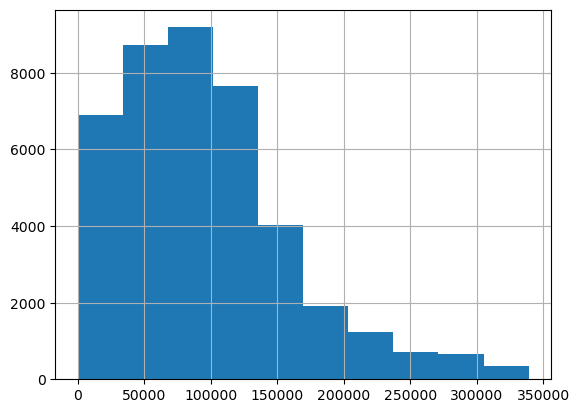

In [8]:
hh.income.hist()

In [9]:
hh.auto_ownership.value_counts().sort_index()

0     3498
1    17728
2    15119
3     3623
4     1412
Name: auto_ownership, dtype: int64

In [10]:
hh.hhsize.value_counts().sort_index()

1     16753
2     15127
3      4248
4      3520
5      1202
6       369
7        90
8        48
9        10
10        8
11        3
13        2
Name: hhsize, dtype: int64

In [11]:
hh.num_workers.value_counts().sort_index()

0    10275
1    17468
2    12734
3      740
4      132
5       23
6        4
7        2
8        2
Name: num_workers, dtype: int64

In [12]:
pd.crosstab(hh.hhsize, hh.num_workers, margins = True)

num_workers,0,1,2,3,4,5,6,7,8,All
hhsize,,,,,,,,,,
1,5968,10785,0,0,0,0,0,0,0,16753
2,3850,4078,7199,0,0,0,0,0,0,15127
3,306,1317,2219,406,0,0,0,0,0,4248
4,76,815,2333,186,110,0,0,0,0,3520
5,51,310,731,90,11,9,0,0,0,1202
6,20,104,185,36,8,12,4,0,0,369
7,4,38,39,7,0,2,0,0,0,90
8,0,13,20,11,2,0,0,0,2,48
9,0,6,1,2,1,0,0,0,0,10


In [13]:
pd.crosstab(hh.hhsize, hh.auto_ownership, margins = True)

auto_ownership,0,1,2,3,4,All
hhsize,,,,,,
1,2619,12356,1426,263,89,16753
2,593,3665,8609,1627,633,15127
3,172,1075,1950,785,266,4248
4,73,429,2148,609,261,3520
5,25,148,725,212,92,1202
6,14,36,188,91,40,369
7,0,8,53,19,10,90
8,2,8,15,13,10,48
9,0,2,5,0,3,10


In [14]:
pd.crosstab(hh.num_workers, hh.auto_ownership, margins = True)

auto_ownership,0,1,2,3,4,All
num_workers,,,,,,
0,1725,4970,2816,582,182,10275
1,1481,10661,4200,854,272,17468
2,241,1950,7938,1870,735,12734
3,35,113,150,272,170,740
4,14,20,15,37,46,132
5,2,8,0,8,5,23
6,0,4,0,0,0,4
7,0,0,0,0,2,2
8,0,2,0,0,0,2


<Axes: >

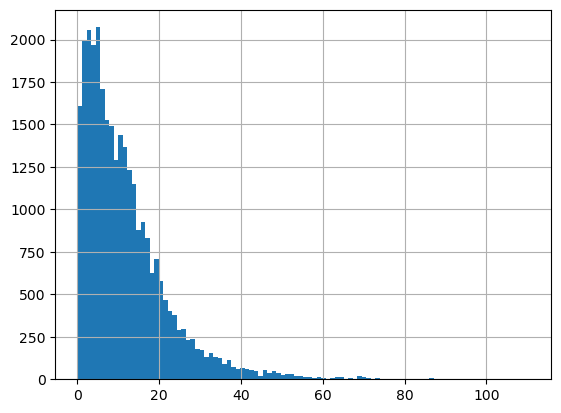

In [15]:
ooh_workers = per[(per['is_worker']) & (per['workplace_zone_id'] >= 0)].merge(hh[['household_id', 'home_zone_id']], how = 'left', on = 'household_id')
ooh_workers['distance_to_work'] = dist_skim[ooh_workers['home_zone_id'].astype(int) - 1, ooh_workers['workplace_zone_id'].astype(int) - 1]

ooh_workers['distance_to_work'].hist(bins = 100)

In [16]:
pd.crosstab((per['workplace_zone_id'] >= 0), per['ptype'])

ptype,1,2,3,4,5,6,7,8
workplace_zone_id,,,,,,,,
False,13502,2311,1698,4170,14360,1030,8506,4585
True,25961,3193,442,23,84,141,0,0
